# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import data from  the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Create a list for holding the latitude and longitude pairs
lat_lngs = []

# Create a list for holding the cities names
cities = []

# Range of acceptible latitudes and longitudes
lat_range = (-90, 90)       # (south pole to north pole)
lng_range = (-180, 180)     # (360 degrees around the earth)

# Create the random lat and long combinations
# Collect 1500  latitudes &  1500 longitudes to work with
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)     
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)     
# Create ur list of lat & long pairs
lat_lngs = zip(lats, lngs)                                          

# Identify the nearest city for each lat & long pair
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the nearest city is a unique value, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm we have sufficient data
# This list will be less than the 1500 pairs we started with  because multiple lat/longs combinations may exist where the nearest city is the same.
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 560


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL  - Built-in API request by city name [accepts two query parameters - appid and q]
url = 'https://api.openweathermap.org/data/2.5/weather?units=metric&appid=' + weather_api_key

# Create a  weather data list for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through each city in our data list to fetch the weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city - add second query parameter (q)
    city_url = url + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Read the JSON and retrieve the json data for each city
        city_weather = requests.get(city_url).json()
       
        # Filter out the latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['temp_min']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If a city is not found, skip that city
    except Exception as e :
        print("City not found. Skipping...")
        print(e)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | devonport
Processing Record 2 of Set 1 | mogocha
Processing Record 3 of Set 1 | ormara
Processing Record 4 of Set 1 | el galpon
Processing Record 5 of Set 1 | tiksi
Processing Record 6 of Set 1 | tazovsky
Processing Record 7 of Set 1 | namtsy
Processing Record 8 of Set 1 | broome
Processing Record 9 of Set 1 | trinidad
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | mangai
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | taoudenni
Processing Record 15 of Set 1 | inirida
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | vilyuysk
Processing Record 18 of Set 1 | trairi
Processing Record 19 of Set 1 | petropavlovsk-kamchatsky
Processing Record 20 of Set 1 | cabo san lucas
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 of Set 1 | lewistown
Processi

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          539
Lat           539
Lng           539
Max Temp      539
Humidity      539
Cloudiness    539
Wind Speed    539
Country       539
Date          539
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,devonport,-41.1667,146.3500,9.45,6.96,85,4.69,AU,1687788511
1,mogocha,53.7333,119.7667,16.74,16.74,100,1.51,RU,1687788595
2,ormara,25.2088,64.6357,29.51,29.51,55,6.56,PK,1687788596
3,el galpon,-25.3807,-64.6526,23.64,23.64,0,1.34,AR,1687788597
4,tiksi,71.6872,128.8694,10.26,10.26,92,2.81,RU,1687788598


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [16]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,devonport,-41.1667,146.3500,9.45,6.96,85,4.69,AU,1687788511
1,mogocha,53.7333,119.7667,16.74,16.74,100,1.51,RU,1687788595
2,ormara,25.2088,64.6357,29.51,29.51,55,6.56,PK,1687788596
3,el galpon,-25.3807,-64.6526,23.64,23.64,0,1.34,AR,1687788597
4,tiksi,71.6872,128.8694,10.26,10.26,92,2.81,RU,1687788598
5,tazovsky,67.4667,78.7000,11.27,11.27,15,0.99,RU,1687788599
6,namtsy,62.7161,129.6658,19.78,19.78,39,2.25,RU,1687788600
7,broome,42.2506,-75.8330,25.10,22.52,0,5.14,US,1687788600
8,trinidad,-14.8333,-64.9000,27.52,27.52,69,1.90,BO,1687788601


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

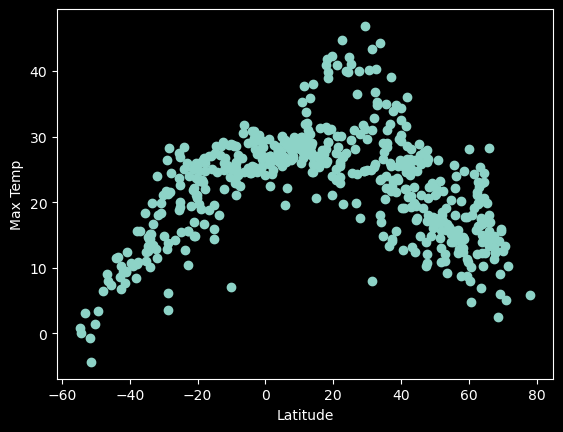

In [14]:
# Build scatter plot for latitude vs. temperature
import matplotlib.pyplot as plt

x = list(city_data_df['Lat'])
y = list(city_data_df['Max Temp'])
plt.scatter(x, y)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

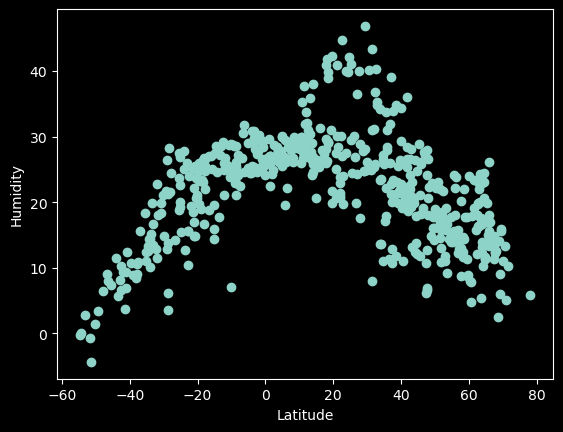

In [15]:
# Build the scatter plots for latitude vs. humidity
import matplotlib.pyplot as plt

x = list(city_data_df['Lat'])
y = list(city_data_df['Humidity'])
plt.scatter(x, y)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

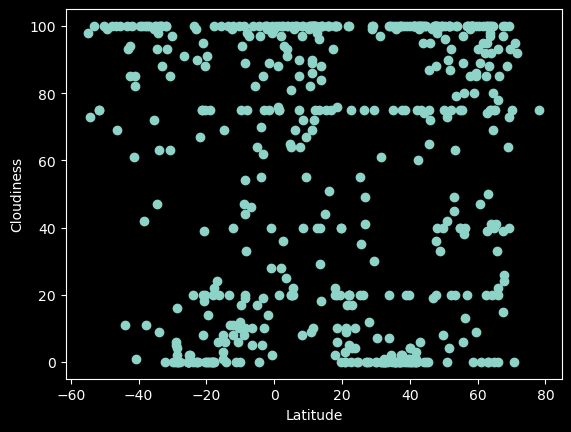

In [17]:
# Build the scatter plots for latitude vs. cloudiness
import matplotlib.pyplot as plt

x = list(city_data_df['Lat'])
y = list(city_data_df['Cloudiness'])
plt.scatter(x, y)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

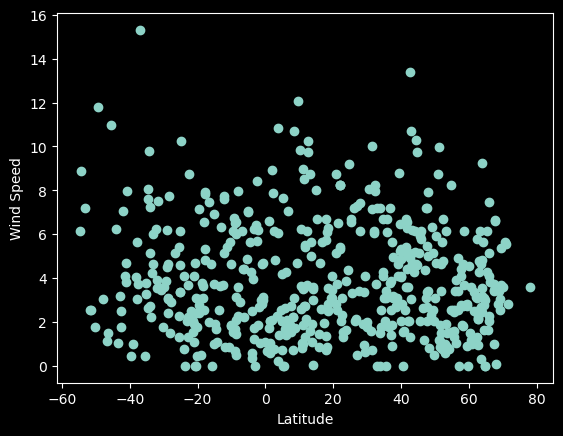

In [18]:
# Build the scatter plots for latitude vs. wind speed
import matplotlib.pyplot as plt

x = list(city_data_df['Lat'])
y = list(city_data_df['Wind Speed'])
plt.scatter(x, y)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
import matplotlib.pyplot as plt
from scipy import stats

def myfunc(x, y, titleX, titleY):
    slope, intercept, r, p, std_err = stats.linregress(x, y)
    myline = []
    for i in range(len(x)):
        myline.append(slope * x[i] + intercept)
    plt.scatter(x, y)
    plt.plot(x, myline)
    plt.xlabel(titleX)
    plt.ylabel(titleY)
    plt.text(0.1, 0.1, f'y = {slope:.2f}x + {intercept:.2f}')
    plt.show()
    return slope


In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (0, 90)       # from 0deg latitude to +90deg latitude (equator to north pole)
lng_range = (-180, 180)     # from -180deg logitude to +180deg longitude (Fiji to Fiji)

# Create a set of random lat and lng pairs
lats = np.random.uniform(lat_range[0], lat_range[1], size=750)     # a list of 1500 latitude from a uniform rectangular distribution
lngs = np.random.uniform(lng_range[0], lng_range[1], size=750)     # a list of 1500 longitudes from a uniform rectangular distribution
lat_lngs = zip(lats, lngs)                                          # Combine the two lists, pair wise in to a list of tuples (lat, long pair)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    if float(city.lat) < 0:    # Skip if nearest city is in southern hemisphere
        continue
    
    # If the city is unique, then add it to a our cities list
    if city.city_name not in cities:
        cities.append(city.city_name)

# Print the city count to confirm sufficient count
# This will be less than 750 because multiple lat/longs will be close to the same island in the Pacific/Atlantic oceans.
print(f"Number of cities in the list: {len(cities)}")

# Set the API base URL - Built-in API request by city name [accepts two query parameters - appid and q]
url = 'https://api.openweathermap.org/data/2.5/weather?units=metric&appid=' + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through each city in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city - add second query parameter (q)
    city_url = url + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Read the JSON and retrieve required data 
        city_weather = requests.get(city_url).json()
        
        # Read the latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['temp_min']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        if float(city_lat) < 0:
            continue

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e :
        print("City not found. Skipping...")
        print(e)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Convert the cities weather data into a Pandas DataFrame
northern_hemi_df = pd.DataFrame(city_data)

# Show Record Count
northern_hemi_df.count()

# Display sample data
northern_hemi_df.head()

Number of cities in the list: 396
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | tazovsky
Processing Record 3 of Set 1 | chegdomyn
Processing Record 4 of Set 1 | petropavlovsk-kamchatsky
Processing Record 5 of Set 1 | maba
Processing Record 6 of Set 1 | bethel
Processing Record 7 of Set 1 | lazaro cardenas
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | hawaiian paradise park
Processing Record 10 of Set 1 | uusikaupunki
Processing Record 11 of Set 1 | tura
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | harstad
Processing Record 14 of Set 1 | ilulissat
Processing Record 15 of Set 1 | kailua-kona
Processing Record 16 of Set 1 | vila franca do campo
Processing Record 17 of Set 1 | adrar
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | yuzhno-kurilsk
Processing R

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,11.09,11.09,94,3.70,RU,1687790261
1,tazovsky,67.4667,78.7000,10.71,10.71,27,0.61,RU,1687790378
2,chegdomyn,51.1167,133.0167,17.09,17.09,52,1.01,RU,1687790585
3,petropavlovsk-kamchatsky,53.0452,158.6483,11.33,10.99,0,1.00,RU,1687790097
4,maba,24.6841,113.5984,25.03,25.03,100,0.28,CN,1687790587


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 0)       # from -90deg latitude to 0deg latitude (south pole to north pole)
lng_range = (-180, 180)     # freom -180deg logitude to +180deg longitude (Fiji to Fiji)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=750)     # a list of 1500 latitude from a uniform rectangular distribution
lngs = np.random.uniform(lng_range[0], lng_range[1], size=750)     # a list of 1500 longitudes from a uniform rectangular distribution
lat_lngs = zip(lats, lngs)                                          # Combine the two lists, pair wise in to a list of tuples (lat, long pair)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    if float(city.lat) > 0:     # Skip if the nearest city is in the northern hemisphere
        continue
    
    # If the city is unique, then add it to a our cities list
    if city.city_name not in cities:
        cities.append(city.city_name)

# Print the city count to confirm sufficient count
# This will be less than 1500 because multiple lat/longs will be close to the same island in the Pacific/Atlantic oceans.
print(f"Number of cities in the list: {len(cities)}")

# Set the API base URL - Built-in API request by city name [accepts two query parameters - appid and q]
url = 'https://api.openweathermap.org/data/2.5/weather?units=metric&appid=' + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city - add second query parameter (q)
    city_url = url + '&q=' + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data - well, fetch the response and extract the JSON payload
        city_weather = requests.get(city_url).json()
        '''
        Example of API response
        {
            "coord": { "lon": 10.99, "lat": 44.34 },
            "weather": [
                { "id": 501, "main": "Rain", "description": "moderate rain", "icon": "10d" }
            ],
            "base": "stations",
            "main": { "temp": 298.48, "feels_like": 298.74, "temp_min": 297.56, "temp_max": 300.05,
                    "pressure": 1015, "humidity": 64, "sea_level": 1015, "grnd_level": 933 },
            "visibility": 10000,
            "wind": { "speed": 0.62, "deg": 349, "gust": 1.18 },
            "rain": { "1h": 3.16 },
            "clouds": { "all": 100 },
            "dt": 1661870592,
            "sys": { "type": 2, "id": 2075663, "country": "IT", "sunrise": 1661834187, "sunset": 1661882248 },
            "timezone": 7200,
            "id": 3163858,
            "name": "Zocca",
            "cod": 200
        }
        '''

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['temp_min']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        if float(city_lat) > 0:
            continue

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e :
        print("City not found. Skipping...")
        print(e)
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Convert the cities weather data into a Pandas DataFrame
southern_hemi_df = pd.DataFrame(city_data)

# Show Record Count
southern_hemi_df.count()

# Display sample data
southern_hemi_df.head()

Number of cities in the list: 174
Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto ayora
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | katima mulilo
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | port mathurin
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | rengasdengklok
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | stanley
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | blackmans bay
Processing Record 15 of Set 1 | newman
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
'coord'
Processing Record 17 of Set 1 | margaret river
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto ayora,-0.7393,-90.3518,26.42,26.42,97,2.24,EC,1687791670
1,katima mulilo,-17.5000,24.2667,26.36,26.36,0,2.24,NA,1687791622
2,port-aux-francais,-49.3500,70.2167,3.49,3.49,99,12.68,TF,1687791673
3,port mathurin,-19.6833,63.4167,23.29,23.29,94,7.01,MU,1687791674
4,ushuaia,-54.8000,-68.3000,0.81,-0.21,97,6.17,AR,1687791580


###  Temperature vs. Latitude Linear Regression Plot

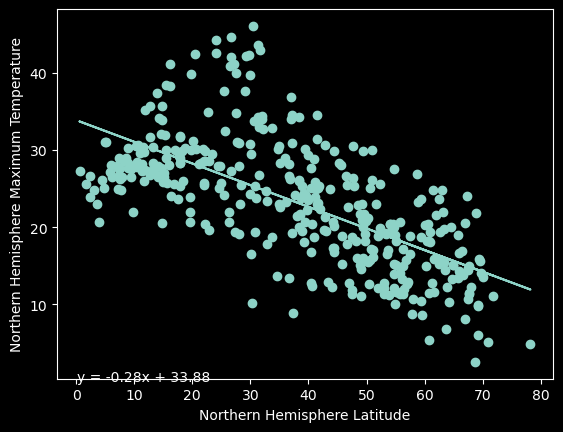

the r-value is: -0.28088500390469945


In [27]:
# Linear regression on Northern Hemisphere
y = list(northern_hemi_df['Max Temp'])
x = list(northern_hemi_df['Lat'])
titleY = 'Northern Hemisphere Maximum Temperature'
titleX = 'Northern Hemisphere Latitude'
r = myfunc(x, y, titleX, titleY)
print(f'the r-value is: {r}')

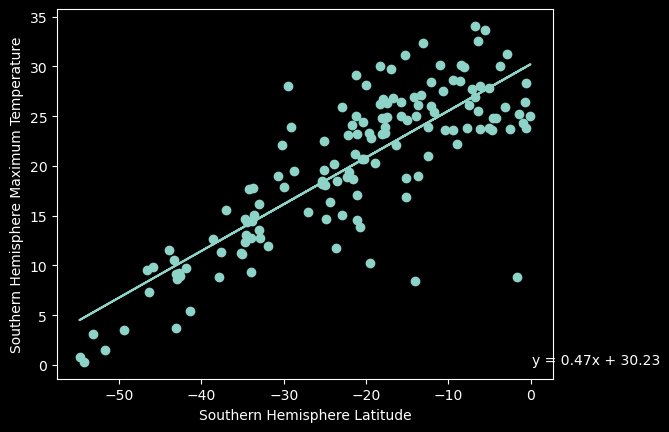

the r-value is: 0.46937897103683573


In [28]:
# Linear regression on Southern Hemisphere
y = list(southern_hemi_df['Max Temp'])
x = list(southern_hemi_df['Lat'])
titleY = 'Southern Hemisphere Maximum Temperature'
titleX = 'Southern Hemisphere Latitude'
r = myfunc(x, y, titleX, titleY)
print(f'the r-value is: {r}')

**Discussion about the linear relationship:** As you move further away from the equator maximum temperature decrease. The effect is worse in the southern hemisphere and there are fewer cities close to the south pole, compared to cities close to the north pole.

### Humidity vs. Latitude Linear Regression Plot

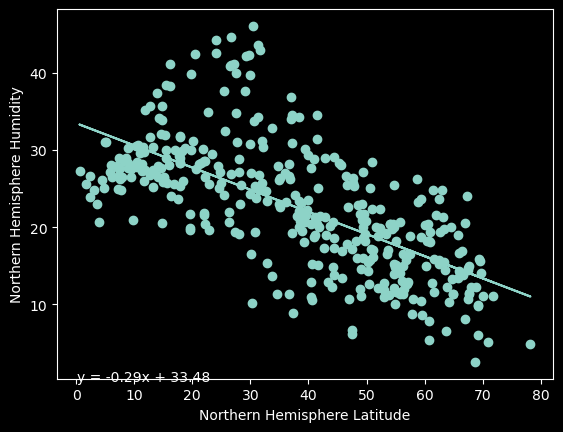

the r-value is: -0.2873784623536718


In [29]:
# Northern Hemisphere
y = list(northern_hemi_df['Humidity'])
x = list(northern_hemi_df['Lat'])
titleY = 'Northern Hemisphere Humidity'
titleX = 'Northern Hemisphere Latitude'
r = myfunc(x, y, titleX, titleY)
print(f'the r-value is: {r}')

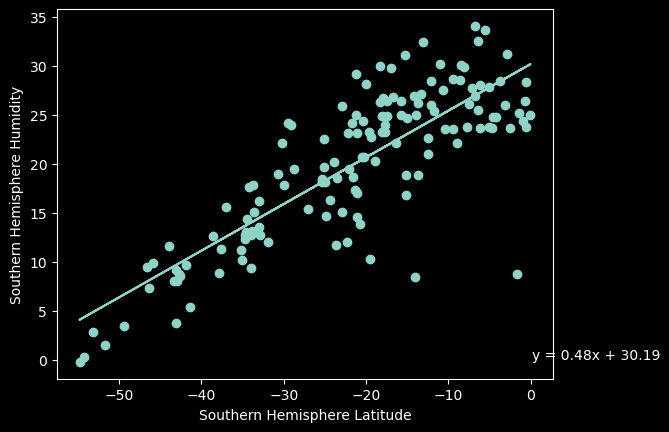

the r-value is: 0.4761962551742587


In [30]:
# Southern Hemisphere
y = list(southern_hemi_df['Humidity'])
x = list(southern_hemi_df['Lat'])
titleY = 'Southern Hemisphere Humidity'
titleX = 'Southern Hemisphere Latitude'
r = myfunc(x, y, titleX, titleY)
print(f'the r-value is: {r}')

**Discussion about the linear relationship:** The humidity relationship are very similar to the temperature relationship. There is a known relationship between temperature and humidty which would account for this similarity.

### Cloudiness vs. Latitude Linear Regression Plot

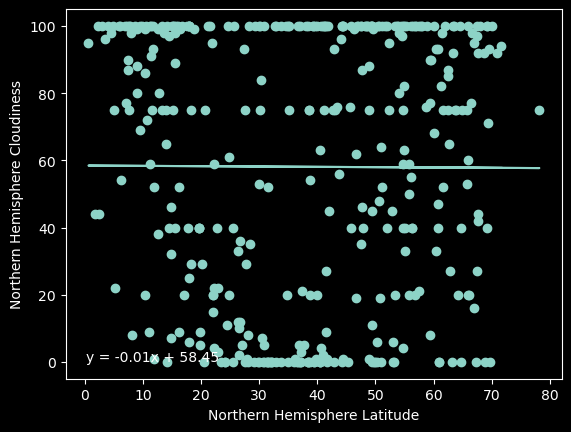

the r-value is: -0.009672377047388984


In [31]:
# Northern Hemisphere
y = list(northern_hemi_df['Cloudiness'])
x = list(northern_hemi_df['Lat'])
titleY = 'Northern Hemisphere Cloudiness'
titleX = 'Northern Hemisphere Latitude'
r = myfunc(x, y, titleX, titleY)
print(f'the r-value is: {r}')

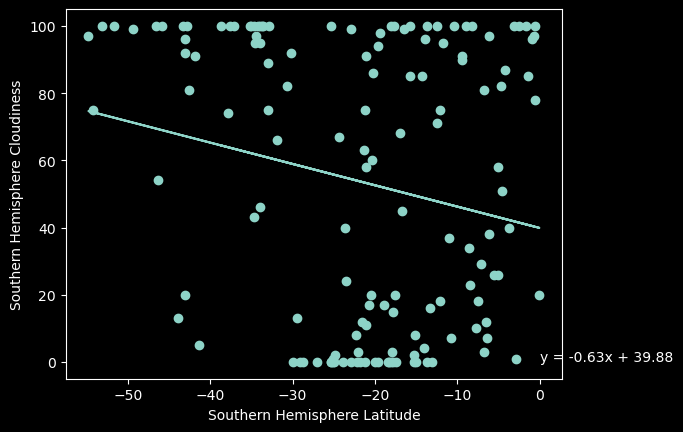

the r-value is: -0.6346868265523109


In [32]:
# Southern Hemisphere
y = list(southern_hemi_df['Cloudiness'])
x = list(southern_hemi_df['Lat'])
titleY = 'Southern Hemisphere Cloudiness'
titleX = 'Southern Hemisphere Latitude'
r = myfunc(x, y, titleX, titleY)
print(f'the r-value is: {r}')

**Discussion about the linear relationship:** There appears to be no relationship between latitude and cloudiness in either hemisphere. The r values are both close to zero.

### Wind Speed vs. Latitude Linear Regression Plot

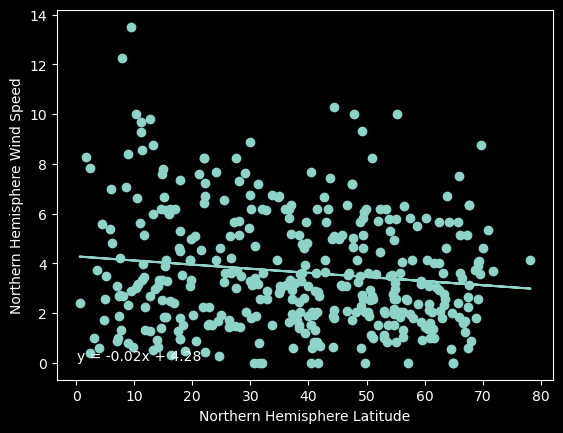

the r-value is: -0.01654619408088602


In [33]:
# Northern Hemisphere
y = list(northern_hemi_df['Wind Speed'])
x = list(northern_hemi_df['Lat'])
titleY = 'Northern Hemisphere Wind Speed'
titleX = 'Northern Hemisphere Latitude'
r = myfunc(x, y, titleX, titleY)
print(f'the r-value is: {r}')

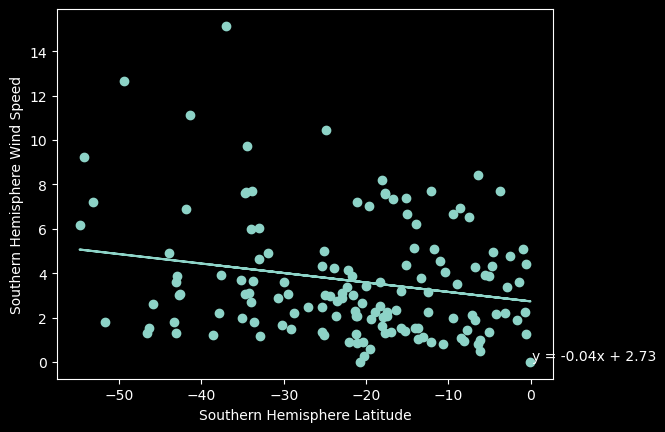

the r-value is: -0.04263256126429473


In [34]:
# Southern Hemisphere
y = list(southern_hemi_df['Wind Speed'])
x = list(southern_hemi_df['Lat'])
titleY = 'Southern Hemisphere Wind Speed'
titleX = 'Southern Hemisphere Latitude'
r = myfunc(x, y, titleX, titleY)
print(f'the r-value is: {r}')

**Discussion about the linear relationship:** Again, there appears to be little or no relationship between latitude and wind speed in either hemisphere. The r values are both very, very close to zero.